# Evaluation of the uncertainty of the coefficient of thermal expansion of a ceramic dimensional gauge block measured by interferometry.

Firstly, we import the necessary libraries to calculate the partial derivates and evaluate

In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

Then we define the measurement function and asign it to the variable `alpha` through the `sympy` package. And assign evaluation values to the variables of `alpha`.

In [23]:
from sympy import symbols
# Symbolic Definitions
P, l, L_0, T, T_0 = symbols('P lambda L_0 T T_0') 

# Equation for alpha
alpha = (P * l)/(2 * L_0 * (T - T_0))


# Numeric Values
N_eval = 125
lambda_eval = 532*10**(-9)
L_0_eval = 80*10**(-3)
T_eval = 60
T_0_eval= 20

# Calculate the best estimate of alpha
## Note that the variable N is sustituted by P, as N presents issues when using the subs() function
alpha_Eval= alpha.subs(P, N_eval).subs(l, lambda_eval).subs(L_0, L_0_eval).subs(T, T_eval).subs(T_0, T_0_eval)
alpha_Eval.evalf()

1.03906250000000e-5

Now the first and second order sensibility coefficients for the combined standard uncertainty of alpha are calculated and presented in a dataframe.

In [24]:
difVariables = [P,l,L_0,T,T_0]

sensibilityCoeficients = []
sensibilityCoeficientsVariable = []


#Sensibility coeficients for first order partial derivatives
for variable in difVariables:
    derivative = sp.diff(alpha,variable)
    sensibilityCoeficients.append(derivative)
    sensibilityCoeficientsVariable.append(str(variable))

#Sensibility coeficients for high order derivatives
for variable_i in difVariables:
    for variable_j in difVariables:
        sc = 1/2 * (sp.diff(sp.diff(alpha,variable_j),variable_i))**2 + sp.diff(alpha,variable_i)*sp.diff(sp.diff(sp.diff(alpha,variable_j),variable_j),variable_i)

        sensibilityCoeficients.append(sc)
        sensibilityCoeficientsVariable.append(str(variable_i)+", "+str(variable_j))


#Sensibility coeficients are evaluated using the .subs() function
sensibilityCoeficientsEval = []

for func in sensibilityCoeficients:
    func_Eval= func.subs(P, N_eval).subs(l, lambda_eval).subs(L_0, L_0_eval).subs(T, T_eval).subs(T_0, T_0_eval)
    sensibilityCoeficientsEval.append(func_Eval)


#SensibilityCoeficients are arranged in a data frame with its evaluation 
Coeficients = {'Evaluation':sensibilityCoeficientsEval,'SensibilityCoeficients':sensibilityCoeficients,'SensibilityCoeficientsVariables':sensibilityCoeficientsVariable}
Coeficientsdf = pd.DataFrame(Coeficients, columns=['SensibilityCoeficientsVariables','SensibilityCoeficients','Evaluation'])
Coeficientsdf

,SensibilityCoeficientsVariables,SensibilityCoeficients,Evaluation
0,P,lambda/(2*L_0*(T - T_0)),8.31250000000000e-8
1,lambda,P/(2*L_0*(T - T_0)),19.5312500000000
2,L_0,-P*lambda/(2*L_0**2*(T - T_0)),-0.000129882812500000
3,T,-P*lambda/(2*L_0*(T - T_0)**2),-2.59765625000000e-7
4,T_0,P*lambda/(2*L_0*(T - T_0)**2),2.59765625000000e-7
5,"P, P",0,0
6,"P, lambda",0.125/(L_0**2*(T - T_0)**2),0.0122070312500000
7,"P, L_0",0.625*lambda**2/(L_0**4*(T - T_0)**2),2.69912719726563e-12
8,"P, T",0.625*lambda**2/(L_0**2*(T - T_0)**4),1.07965087890625e-17
9,"P, T_0",0.625*lambda**2/(L_0**2*(T - T_0)**4),1.07965087890625e-17


Now contributions are calculated using the uncertainty given for evaluated values


In [25]:
#Uncertainties are calculated using the given data 
u_N = 1 /np.sqrt(3)
#u_lambda = 5*10**(-9) /np.sqrt(3)
u_lambda = 25*10**(-9)/np.sqrt(3)
u_L_0 = 0.05*10**(-3) /np.sqrt(3)
u_T = 0.5 /np.sqrt(3)
u_T_0 = 0.5 /np.sqrt(3)

uncertainties = {P:u_N, l:u_lambda, L_0:u_L_0, T:u_T, T_0:u_T_0}

Contributions = []

#Contributions for partial derivatives
for variable in difVariables:
    contribution = sp.diff(alpha,variable).subs(P, N_eval).subs(l, lambda_eval).subs(L_0, L_0_eval).subs(T, T_eval).subs(T_0, T_0_eval) * uncertainties[variable]
    Contributions.append(contribution**2)

#Contributions for high order derivatives

for variable_i in difVariables:
    for variable_j in difVariables:
        contribution = ( 1/2 * (sp.diff(sp.diff(alpha,variable_j),variable_i))**2 + sp.diff(alpha,variable_i)*sp.diff(sp.diff(sp.diff(alpha,variable_j),variable_j),variable_i) ).subs(P, N_eval).subs(l, lambda_eval).subs(L_0, L_0_eval).subs(T, T_eval).subs(T_0, T_0_eval) *uncertainties[variable_i]**2 *uncertainties[variable_j]**2

        Contributions.append(contribution)


#Sensibility coeficients, their evaluation and the contribution to the overall combined uncertainty are put together
Coeficients = { 
    'SensibilityCoeficientsVariables':sensibilityCoeficientsVariable,
    'SensibilityCoeficients':sensibilityCoeficients, 
    'Evaluation':sensibilityCoeficientsEval,
    'Contributions':Contributions
    }

Coeficientsdf = pd.DataFrame(Coeficients)

print(Coeficientsdf)


   SensibilityCoeficientsVariables  \
0                                P   
1                           lambda   
2                              L_0   
3                                T   
4                              T_0   
5                             P, P   
6                        P, lambda   
7                           P, L_0   
8                             P, T   
9                           P, T_0   
10                       lambda, P   
11                  lambda, lambda   
12                     lambda, L_0   
13                       lambda, T   
14                     lambda, T_0   
15                          L_0, P   
16                     L_0, lambda   
17                        L_0, L_0   
18                          L_0, T   
19                        L_0, T_0   
20                            T, P   
21                       T, lambda   
22                          T, L_0   
23                            T, T   
24                          T, T_0   
25          

Finally, the combined uncertainty is calculated with all the contribution values.

In [26]:
#Combined uncertainty
u_Combined = 0
for contribution in Contributions:
    u_Combined = contribution + u_Combined

u_Combined = sp.sqrt(u_Combined)


print("alpha =",alpha_Eval)
print("u(alpha) =",u_Combined)

alpha = 1.03906250000000e-5
u(alpha) = 3.05079002705180e-7


In [27]:
Coeficientsdf.to_csv('out.csv')


## Modelo Expansión Térmica

Gráfico representativo


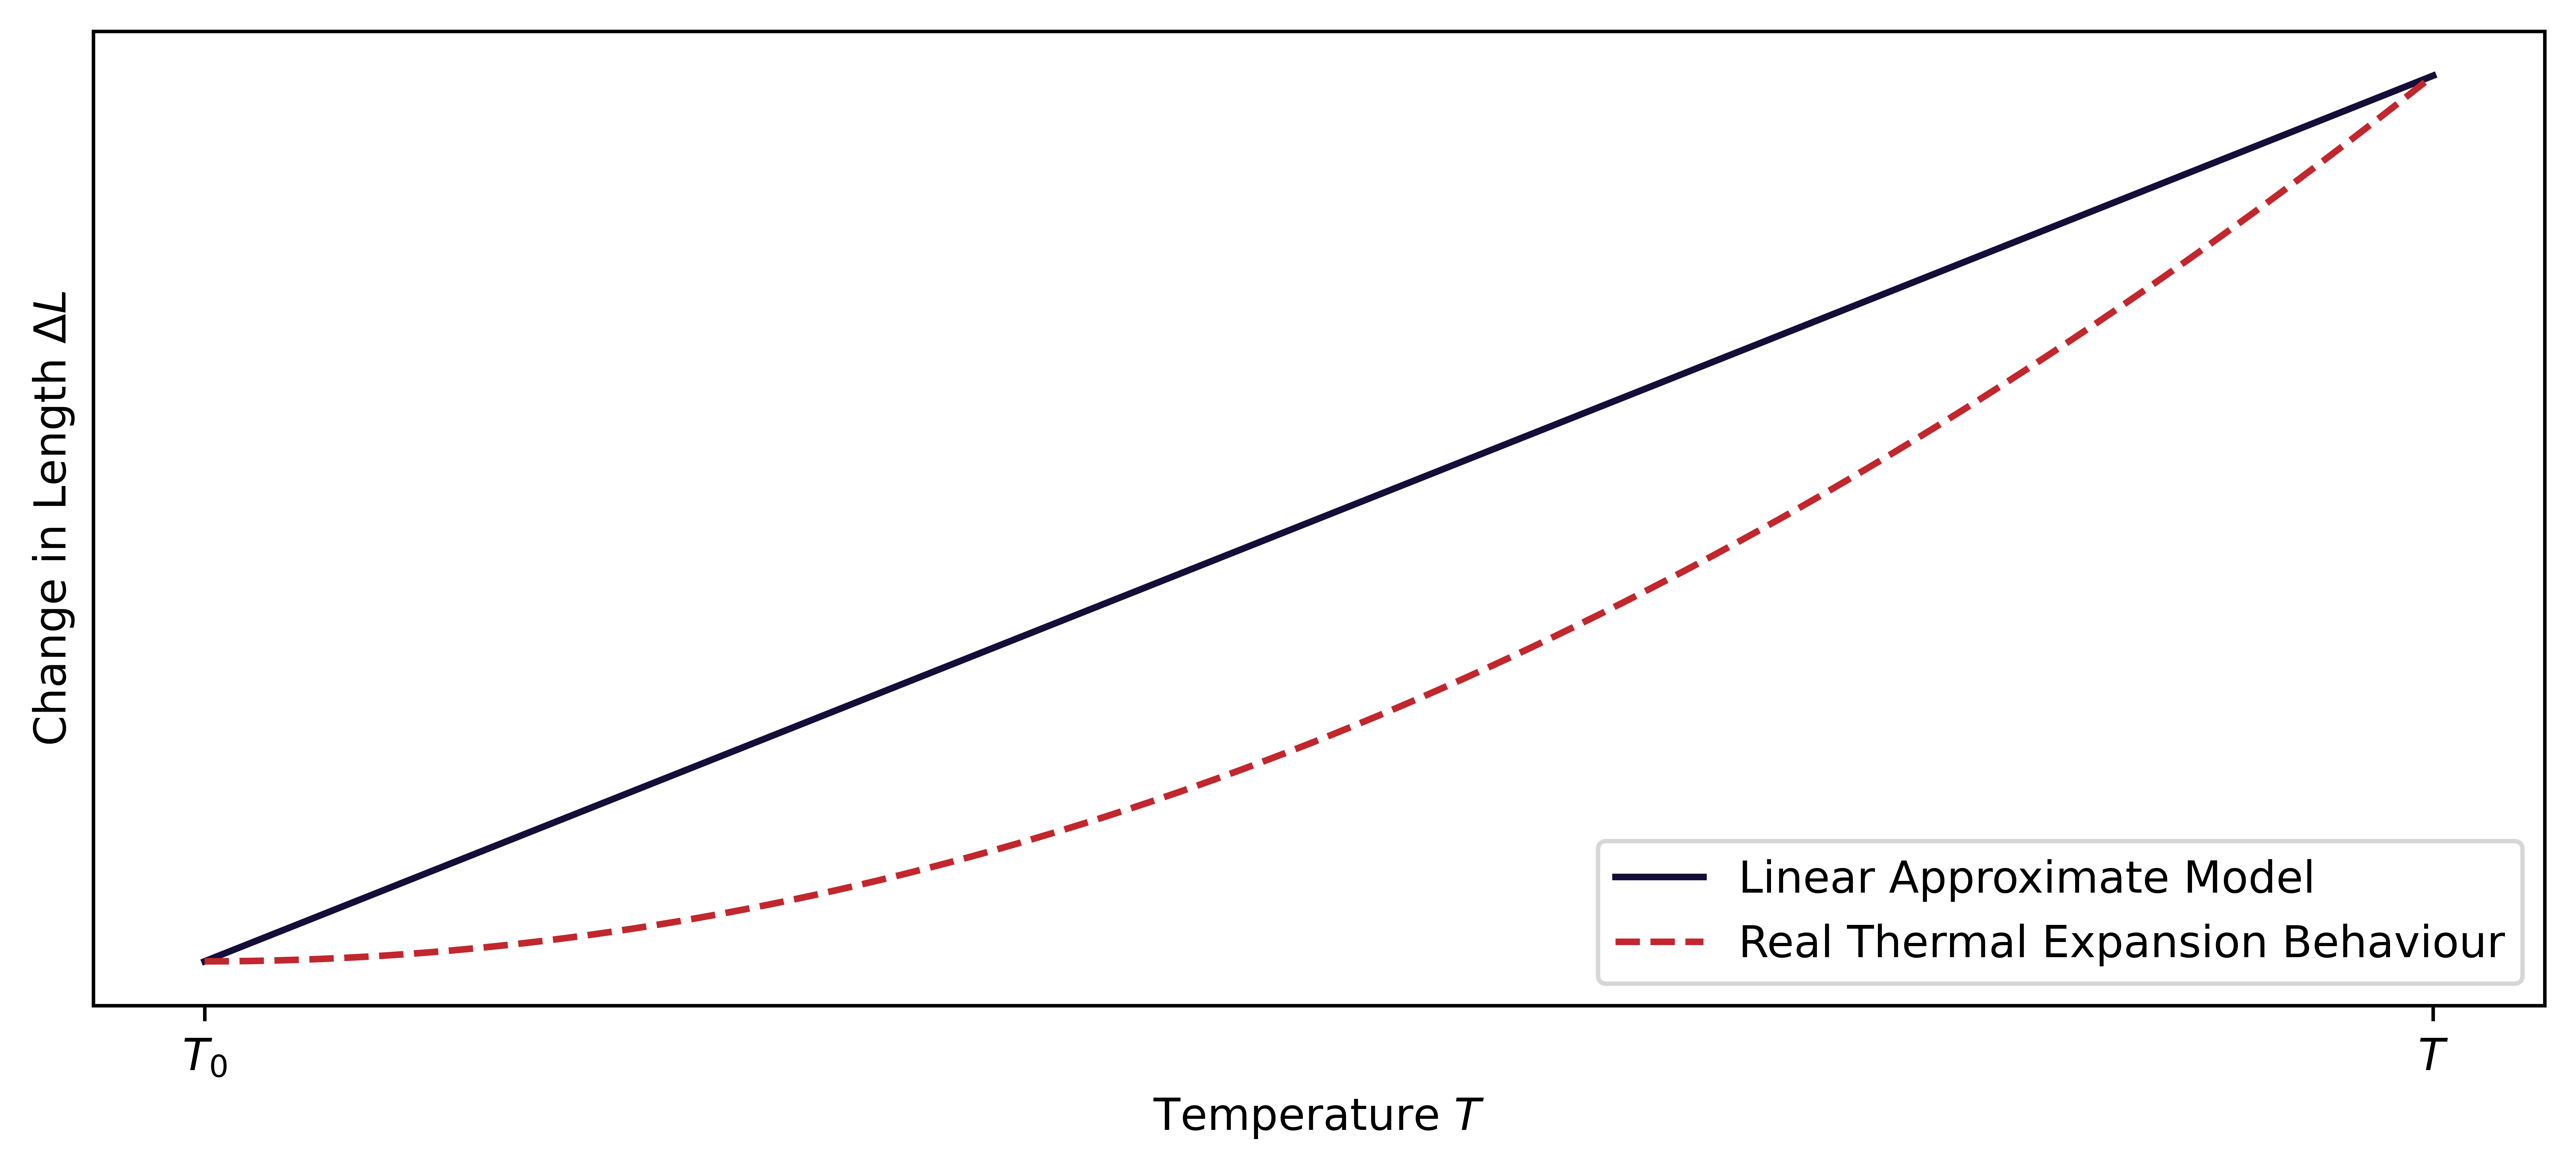

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
y = x

fig, ax = plt.subplots(figsize=(10,4), dpi=1000)
plt.plot(x,y, color="#140e39", label="Linear Approximate Model")
plt.plot(x,x**2, color="#c1272d", label="Real Thermal Expansion Behaviour", linestyle="dashed")
plt.legend(loc="lower right")
plt.xlabel("Temperature $T$")
plt.ylabel("Change in Length $\Delta L$")
plt.xticks([0,1], labels=["$T_0$","$T$"])
plt.yticks([])
plt.show()
